[download source](./plot.ipynb)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
from scipy.stats import norm, lognorm
import math
import contextlib

In [2]:
%config InlineBackend.figure_formats = ['svg']
matplotlib.rcParams['svg.hashsalt'] = '12345'

In [3]:
# distribution chosen to be roughly similar to US household income:
# https://dqydj.com/average-median-top-household-income-percentiles/
ln_params = dict(loc=0, scale=60000, s=1)
print("Median", lognorm.ppf(0.5, **ln_params))
print("Top 1%", lognorm.ppf(0.99, **ln_params))
[mean, var] = lognorm.stats(**ln_params, moments='mv')
print(mean, math.sqrt(var))
n_params = dict(loc=mean, scale=np.sqrt(var))
print(norm.stats(**n_params, moments='mv'))
print("Norm top 1%", norm.ppf(0.99, **n_params))

Median 60000.0
Top 1% 614428.4193787279
98923.27624200769 129671.84495370525
(array(98923.27624201), array(1.68147874e+10))
Norm top 1% 400585.0970730134


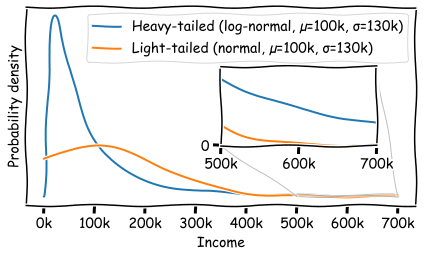

In [6]:
cm = plt.xkcd()
fmt = matplotlib.ticker.FuncFormatter(
    lambda x, pos: f"{int(x/1000):,}k"
)
with cm:
    fig, ax = plt.subplots(figsize=(8, 3.6))
    x = np.linspace(0, 700_000, 1001)
    y_ln = lognorm.pdf(x, **ln_params)
    y_n = norm.pdf(x, **n_params)
    ax.plot(x, y_ln, label='Heavy-tailed (log-normal, µ=100k, σ=130k)')
    ax.plot(x, y_n, label='Light-tailed (normal, µ=100k, σ=130k)')
    ax.set_yticks([])
    ax.set_ylabel("Probability density")
    ax.set_xlabel("Income")
    ax.xaxis.set_major_formatter(fmt)
    
    # inset axes....
    axins = ax.inset_axes([0.5, 0.3, 0.4, 0.4])
    axins.plot(x, y_ln)
    axins.plot(x, y_n)
    # sub region of the original image
    x1, x2, y1, y2 = 500_000, 700_000, -1e-9, 1e-7
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    axins.set_xticks([x1, (x1+x2)/2, x2])
    axins.set_yticks([0])
    axins.xaxis.set_major_formatter(fmt)

    ax.indicate_inset_zoom(axins)
    ax.legend()
    plt.savefig("./plot.svg", metadata={"Date": None}, bbox_inches='tight')